In [115]:
import pandas as pd
import os
%matplotlib inline

In [116]:
experiment_dir = "odsc_west_2018_20181028-190440/"
make_path = lambda x: os.path.join(experiment_dir,x)

In [117]:
lookback = pd.read_csv(make_path("lookback.csv"))

In [118]:
lookback

,average_delay,average_expected_number_obs,average_num_obs_difference,delay_intensity_s,delay_type,frequency_s,frequency_type,lookback_s,max_delay,max_num_obs_difference,percent_points_missed,periodicity_s,rmse_delay,rmse_difference,rmse_no_delay,sensitive
0,10.076852,2.090,0.264,10,ExponentialDelayer,0.1,PoissonProcess,1,86.244744,2,12.631579,10.0,2.620637,2.343254,0.277383,False
1,10.319904,2.226,0.322,10,ExponentialDelayer,0.1,PoissonProcess,2,51.851904,2,14.465409,10.0,2.629602,2.341446,0.288156,False
2,9.986668,2.504,0.352,10,ExponentialDelayer,0.1,PoissonProcess,5,98.115993,4,14.057508,10.0,2.389190,2.093556,0.295634,False
3,10.272929,3.092,0.452,10,ExponentialDelayer,0.1,PoissonProcess,10,63.985116,3,14.618370,10.0,2.274898,1.983109,0.291789,False
4,9.962598,3.898,0.424,10,ExponentialDelayer,0.1,PoissonProcess,20,58.718486,3,10.877373,10.0,1.570808,1.279051,0.291758,False
5,10.507821,4.884,0.526,10,ExponentialDelayer,0.1,PoissonProcess,30,86.872217,4,10.769861,10.0,1.000153,0.712109,0.288044,False
6,9.597094,8.256,0.488,10,ExponentialDelayer,0.1,PoissonProcess,60,56.995953,4,5.910853,10.0,0.757928,0.469173,0.288755,False
7,8.953382,14.178,0.442,10,ExponentialDelayer,0.1,PoissonProcess,120,55.116452,4,3.117506,10.0,0.421461,0.127362,0.294099,False
8,11.005456,35.386,0.612,10,ExponentialDelayer,0.1,PoissonProcess,300,57.927583,4,1.729498,10.0,0.343078,0.048038,0.295041,False
9,9.891699,63.794,0.518,10,ExponentialDelayer,0.1,PoissonProcess,600,68.608006,4,0.811989,10.0,0.311549,0.005342,0.306207,False


Text(0.5, 0, 'Lookback (sec)')

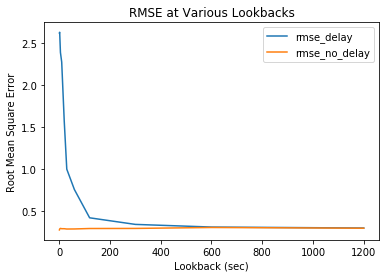

In [119]:
plt = lookback.plot(x = "lookback_s", title="RMSE at Various Lookbacks",y=["rmse_delay","rmse_no_delay"])
plt.set_ylabel("Root Mean Square Error")
plt.set_xlabel("Lookback (sec)")

In [120]:
sensitivities = pd.read_csv(make_path("sensitivities.csv"))

Text(0.5, 0, 'Model Sensitivity')

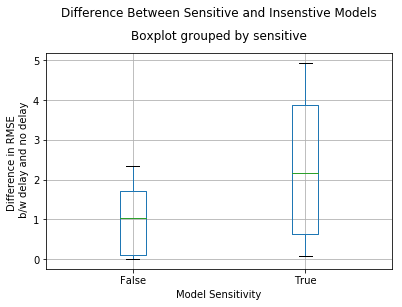

In [121]:
plt = sensitivities.boxplot(by = "sensitive", column = "rmse_difference")
plt.set_title("Difference Between Sensitive and Insenstive Models\n\n")
plt.set_ylabel("Difference in RMSE \n b/w delay and no delay")
plt.set_xlabel("Model Sensitivity")

In [122]:
delays = pd.read_csv(make_path("delay.csv"))

Text(0, 0.5, 'RMSE')

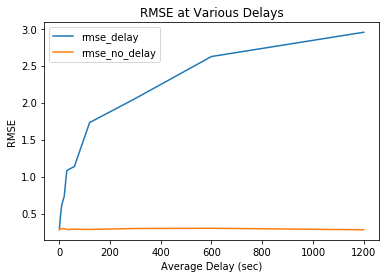

In [123]:
plt = delays.plot(x = "delay_intensity_s", y=["rmse_delay","rmse_no_delay"],title = "RMSE at Various Delays")
plt.set_xlabel(xlabel="Average Delay (sec)")
plt.set_ylabel(ylabel="RMSE")

In [124]:
frequencies = pd.read_csv(make_path("frequencies.csv"))

Text(0, 0.5, 'RMSE')

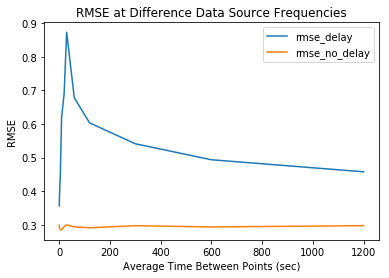

In [125]:
plt = frequencies.plot(x = "periodicity_s", y=['rmse_delay','rmse_no_delay'],title = "RMSE at Difference Data Source Frequencies")
plt.set_xlabel("Average Time Between Points (sec)")
plt.set_ylabel("RMSE")

In [126]:
frequencies

,average_delay,average_expected_number_obs,average_num_obs_difference,delay_intensity_s,delay_type,frequency_s,frequency_type,lookback_s,max_delay,max_num_obs_difference,percent_points_missed,periodicity_s,rmse_delay,rmse_difference,rmse_no_delay,sensitive
0,10.048460,101.908,5.128,10,ExponentialDelayer,1.000000,PoissonProcess,100,73.647327,18,5.031990,1.0,0.356257,0.057341,0.298916,False
1,9.353755,54.718,2.602,10,ExponentialDelayer,0.500000,PoissonProcess,100,57.138335,9,4.755291,2.0,0.391032,0.102815,0.288217,False
2,10.407210,22.778,1.068,10,ExponentialDelayer,0.200000,PoissonProcess,100,86.468315,7,4.688735,5.0,0.447540,0.161525,0.286015,False
3,11.075774,12.110,0.560,10,ExponentialDelayer,0.100000,PoissonProcess,100,68.091724,4,4.624277,10.0,0.618611,0.333831,0.284781,False
4,10.362333,6.892,0.218,10,ExponentialDelayer,0.050000,PoissonProcess,100,75.001726,4,3.163088,20.0,0.690124,0.395315,0.294809,False
5,10.652179,5.078,0.204,10,ExponentialDelayer,0.033333,PoissonProcess,100,71.872692,3,4.017330,30.0,0.873085,0.573132,0.299953,False
6,10.154315,3.746,0.092,10,ExponentialDelayer,0.016667,PoissonProcess,100,48.682347,2,2.455953,60.0,0.678163,0.384418,0.293745,False
7,10.646266,2.848,0.038,10,ExponentialDelayer,0.008333,PoissonProcess,100,64.106221,2,1.334270,120.0,0.603532,0.312306,0.291226,False
8,10.222864,2.300,0.010,10,ExponentialDelayer,0.003333,PoissonProcess,100,54.474338,1,0.434783,300.0,0.541278,0.243953,0.297325,False
9,9.919129,2.154,0.004,10,ExponentialDelayer,0.001667,PoissonProcess,100,49.316746,1,0.185701,600.0,0.493624,0.200000,0.293624,False


## Interactions

In [127]:
import numpy as np
import matplotlib.pyplot as plt
def make_contour_plot(df,levels,title):
    pivoted = df.pivot_table(index="periodicity_s",
                             columns=["delay_intensity_s"],
                             values="rmse_difference",
                             aggfunc='mean')
    X = pivoted.columns.values
    Y = pivoted.index.values
    Z = pivoted.values
    x,y = np.meshgrid(X, Y)
    mesh = plt.contourf(x, y, Z,levels=levels)
    mesh.ax.set_xlabel("Delay Intensity (s)")
    mesh.ax.set_ylabel("Average Time Between Points (s)")
    mesh.ax.set_title(title)
    plt.colorbar(mesh)
    return mesh

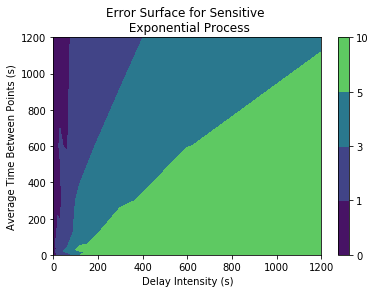

In [128]:
interactions = pd.read_csv(make_path("interaction.csv"))
make_contour_plot(interactions[interactions["sensitive"] == True],
                  levels=[0,1,3,5,10],
                  title = "Error Surface for Sensitive \n Exponential Process")

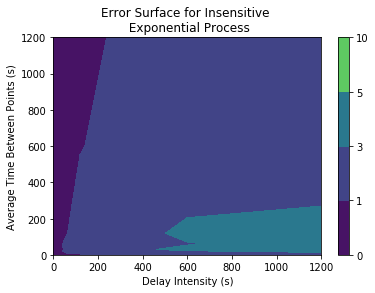

In [129]:
make_contour_plot(interactions[interactions["sensitive"] == False],
                  levels=[0,1,3,5,10],
                  title = "Error Surface for Insensitive \n Exponential Process")

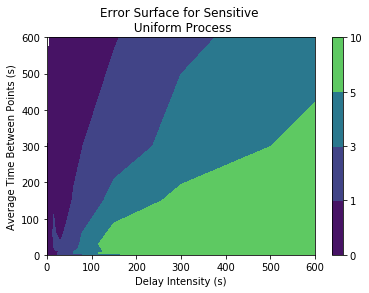

In [130]:
interaction_uniform = pd.read_csv(make_path("interaction_uniform.csv"))
make_contour_plot(interaction_uniform[interaction_uniform["sensitive"] == True],
                  levels=[0,1,3,5,10],
                  title = "Error Surface for Sensitive \n Uniform Process")

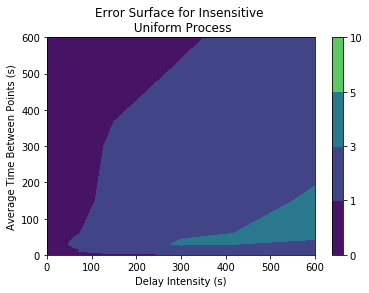

In [132]:
make_contour_plot(interaction_uniform[interaction_uniform["sensitive"] == False],
                  levels=[0,1,3,5,10],
                  title = "Error Surface for Insensitive \n Uniform Process")

In [133]:
freq_vs_lookback = pd.read_csv(make_path("freq_vs_lookback.csv"))
freq_vs_lookback["freq*lookback"] = freq_vs_lookback["frequency_s"]* freq_vs_lookback["lookback_s"]

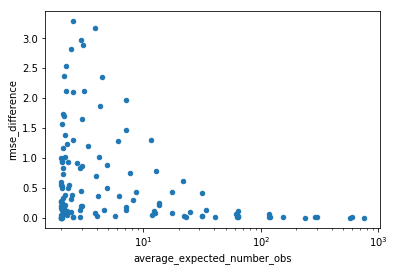

In [134]:
freq_vs_lookback[freq_vs_lookback["delay_intensity_s"]==10].plot.scatter(x = "average_expected_number_obs",
                              y = "rmse_difference",
                              logx = True)

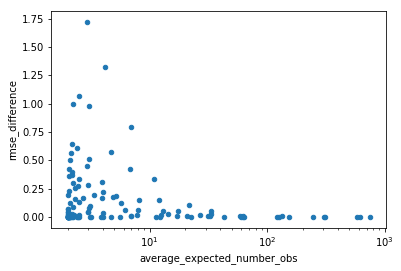

In [135]:
freq_vs_lookback[freq_vs_lookback["delay_intensity_s"]==1].plot.scatter(x = "average_expected_number_obs",
                              y = "rmse_difference",
                              logx = True)

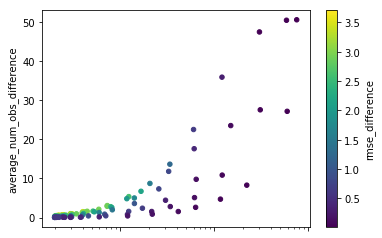

In [150]:
ax =freq_vs_lookback[freq_vs_lookback["delay_intensity_s"]==100].\
plot.scatter(x = "average_expected_number_obs",
             y = "average_num_obs_difference",
             c = "rmse_difference",
             colormap = "viridis",logx=True)


In [151]:
ax.set_xlabel("Test")

Text(0.5, 6.700000000000003, 'Test')

In [153]:
print ax

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(ax)? (<ipython-input-153-13a7aa5c8f75>, line 1)